In [ ]:
import pandas as pd
import numpy as np

INPUT_FILE_PATH = r"C:\Users\TOAN DM\Downloads\chotot_full.csv"
COUNTRY_LOOKUP_PATH = r"D:\Thac si\02_Phat trien phan mem nang cao\khdl2024-ptpm-final\country_price_multiplier.csv"
REF_PRICE_PATH = r"D:\Thac si\02_Phat trien phan mem nang cao\khdl2024-ptpm-final\model_ref_price.csv"

df_input = pd.read_csv(INPUT_FILE_PATH)
df_countries = pd.read_csv(COUNTRY_LOOKUP_PATH)
df_ref_price = pd.read_csv(REF_PRICE_PATH)

d:\Thac si\02_Phat trien phan mem nang cao\khdl2024-ptpm-final\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
df = df_input

# Clean columns
df["price_clean"] = pd.to_numeric(df["price"].str.replace("đ", "").str.replace(".", ""))
df["location_clean"] = df["location"].str.split(", ").apply(lambda x: x[-1])
df["reg_year_clean"] = pd.to_numeric(
    df["reg_year"].case_when(caselist=[(df["reg_year"].eq("trước năm 1980"), 1980)])
)

# Reduce scale of price
df["price_clean"] = df["price_clean"] / 1_000

# Add age
df["age"] = 2025 - df["reg_year_clean"]

# Filter

## Remove vague models
df_filter = df[~df["model"].isin(["Dòng khác", "dòng khác"])]

-0.032721563432804544


<Axes: xlabel='age', ylabel='price_clean'>

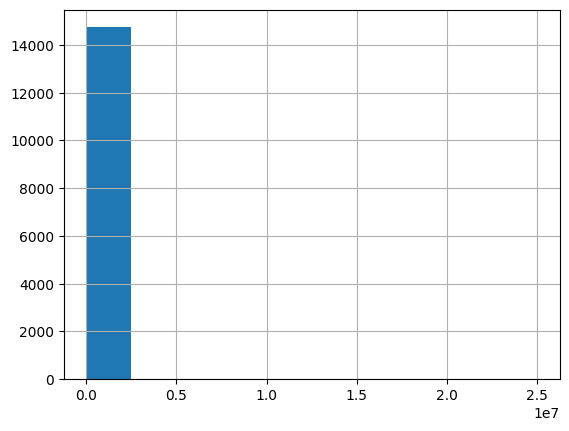

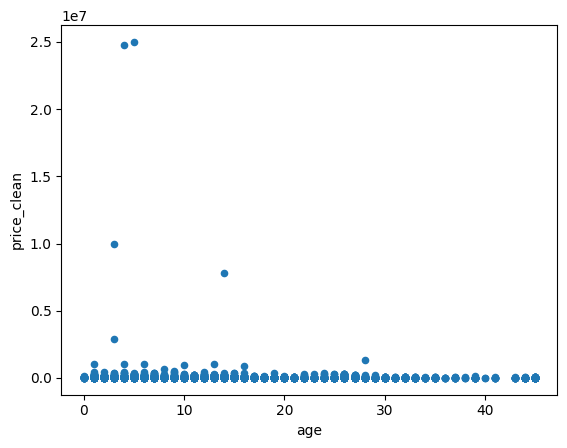

In [39]:
# price distribution
df_filter["price_clean"].hist()

# price vs age
print(df_filter["price_clean"].corr(df_filter["age"]))
df_filter.plot.scatter('age', 'price_clean')

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_filter.groupby("price_clean")["price_clean"].count()

price_clean
0.00           5
0.00           3
0.00           1
0.01           1
0.01           1
              ..
2900000.00     1
7800000.00     1
10000000.00    1
24800000.00    1
25000000.00    1
Name: price_clean, Length: 1043, dtype: int64

In [43]:
## Price should be at least 1M. Look at offers at 600M maximum
df_filter = df_filter[
    df_filter["price_clean"].between(1_000, 600_000, inclusive="neither")
]

-0.1922826906847636


<Axes: xlabel='age', ylabel='price_clean'>

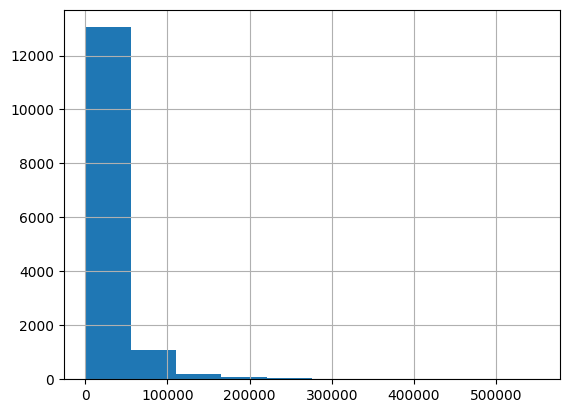

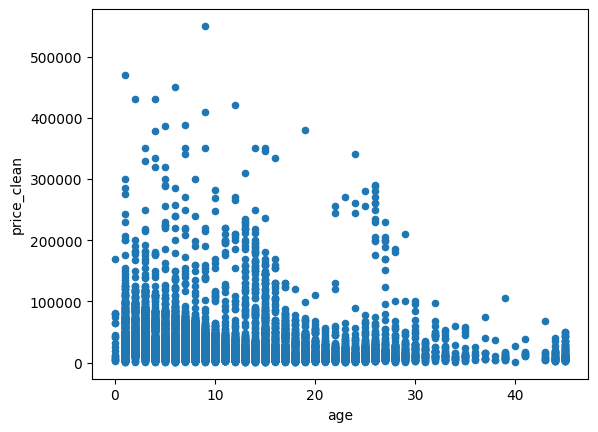

In [46]:
# price distribution
df_filter["price_clean"].hist()

# price vs age
print(df_filter["price_clean"].corr(df_filter["age"]))
df_filter.plot.scatter('age', 'price_clean')

<Axes: >

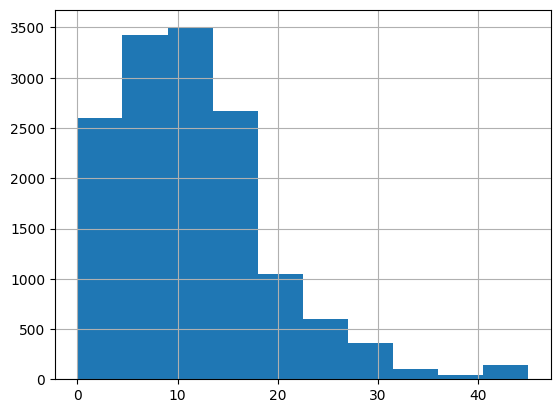

In [54]:
# age distribution
df_filter["age"].hist()

In [55]:
# Move age = 0 to age = 0.5 since the bike must have some age
df_filter["age_updated"] = df["age"].case_when(caselist=[(df["age"].eq(0), 0.5)])

# Log transform
df_filter["price_log"] = np.log(df_filter["price_clean"])
df_filter["age_log"] = np.log(df_filter["age_updated"])

<Axes: >

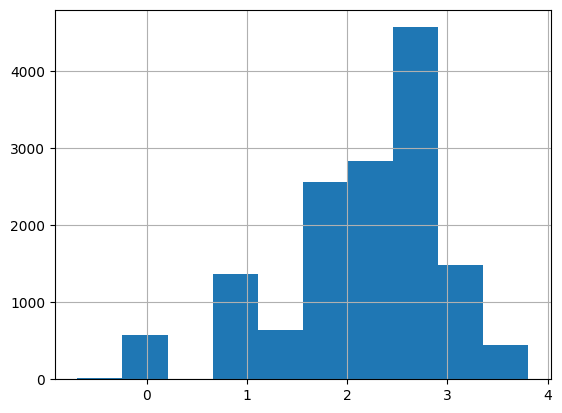

In [57]:
# age distribution
df_filter["age_log"].hist()

-0.4046229153591848


<Axes: xlabel='age_log', ylabel='price_log'>

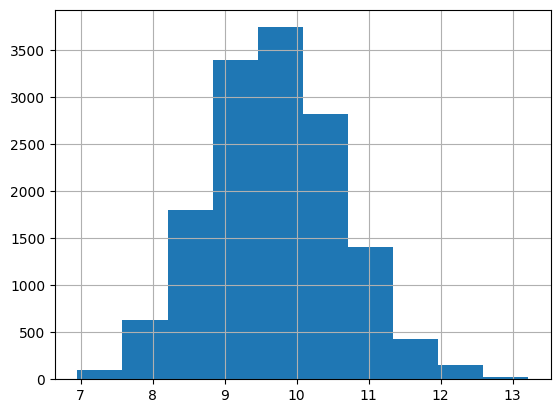

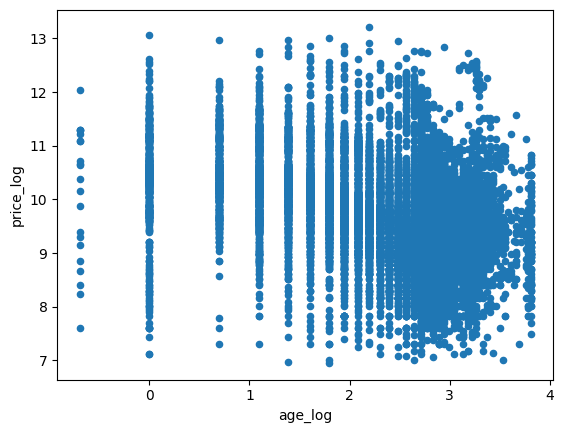

In [59]:
# price distribution
df_filter["price_log"].hist()

# price vs age
print(df_filter["price_log"].corr(df_filter["age_log"]))
df_filter.plot.scatter('age_log', 'price_log')